# Enigma 003 : The Four-Square Chessboard

In [30]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import matplotlib
from qiskit.circuit.library import MCXGate

The enigma uses an addition modulo two like this one

            10
          + 01
            __
            11

Such addition has the interesting characteristic that the numbers can be interchanged to any order like this

  
            11
          + 01
            __
            10

Or

            11
          + 10
            __
            01

Meaning that adding any two of them gives the third one as an answer (this is true for any numbers). Playing with modulo two additions also have other interesting characteristics. In the enigma, adding the first number to the second is done by applying a CNOT between q4 and q6 (and q5 and q7). What is the value on q6 after such an operation?

    [x] Q6 now has the answer to the modulo two addition 
        between q4 and q6.
    [ ] An extra qubit would be needed to have the answer to 
        the modulo two addition between q4 and q6.
    [ ] No addition has been performed between q4 and q6.
    [ ] The CNOT does not permit to perform modulo two 
        additions.


**Question 2 : Write the circuit for a 4 by 4 square chess**

Can you write the circuit for a 4 by 4 square chess set until you calculate the position of the piece to turn?

*HINT 1*

Start by drawing a 4 by 4 chess board and number each square from 0 to 15 in decimal and binary numbers starting with the top row.

*HINT 2*

The trick is now to add (modulo two) all the squares that end with a 1 and to proceed the same way with all squares that have a 1 on their second bit counting from right to left and so on using four extra squares. (Maybe should we add the drawing provided in the Word doc.)

*Hint 3*
Provide the drawing of Hint 2 with the arrows for the counting

In [31]:
nb_coins = 16

#qubits 0 to 15 are the 16 squares
#qubits 16 to 19 is where the key is hidden
#qubits 20 to 23 is where the focus first lands
#qubits 24 to 27 is where the focus lands at the end which is the key location
problem2_qc = QuantumCircuit(nb_coins+12)

#coin distribution on each square
for i in range(16):
    problem2_qc.h(i)

problem2_qc.barrier()

#hiding the key under one of the 16 squares
for i in range(16, 20):
    problem2_qc.h(i)

problem2_qc.barrier()

#finding the parity of 1's on squares for which binary numbers finish by 1 and putting the answer on q20
problem2_qc.cx(1, 20)
problem2_qc.cx(3, 20)
problem2_qc.cx(5, 20)
problem2_qc.cx(7, 20)
problem2_qc.cx(9, 20)
problem2_qc.cx(11, 20)
problem2_qc.cx(13, 20)
problem2_qc.cx(15, 20)
problem2_qc.barrier()

#finding the parity of 1's on squares for which binary numbers have a 1 as second to last digit and putting the answer on q21
problem2_qc.cx(2, 21)
problem2_qc.cx(3, 21)
problem2_qc.cx(6, 21)
problem2_qc.cx(7, 21)
problem2_qc.cx(10, 21)
problem2_qc.cx(11, 21)
problem2_qc.cx(14, 21)
problem2_qc.cx(15, 21)
problem2_qc.barrier()

#finding the parity of 1's on squares for which binary numbers have a 1 as their 3rd digit from the right and putting the answer on q22
problem2_qc.cx(4, 22)
problem2_qc.cx(5, 22)
problem2_qc.cx(6, 22)
problem2_qc.cx(7, 22)
problem2_qc.cx(12, 22)
problem2_qc.cx(13, 22)
problem2_qc.cx(14, 22)
problem2_qc.cx(15, 22)
problem2_qc.barrier()

#finding the parity of 1's on squares for which binary numbers have a 1 as their 4th digit from the right and putting the answer on q23
problem2_qc.cx(8, 23)
problem2_qc.cx(9, 23)
problem2_qc.cx(10, 23)
problem2_qc.cx(11, 23)
problem2_qc.cx(12, 23)
problem2_qc.cx(13, 23)
problem2_qc.cx(14, 23)
problem2_qc.cx(15, 23)
problem2_qc.barrier()

#adding modulo 2 the position of the key and the position of the focus
problem2_qc.cx(16, 20)
problem2_qc.cx(17, 21)
problem2_qc.cx(18, 22)
problem2_qc.cx(19, 23)

#problem_qc_temp = problem_qc.copy()

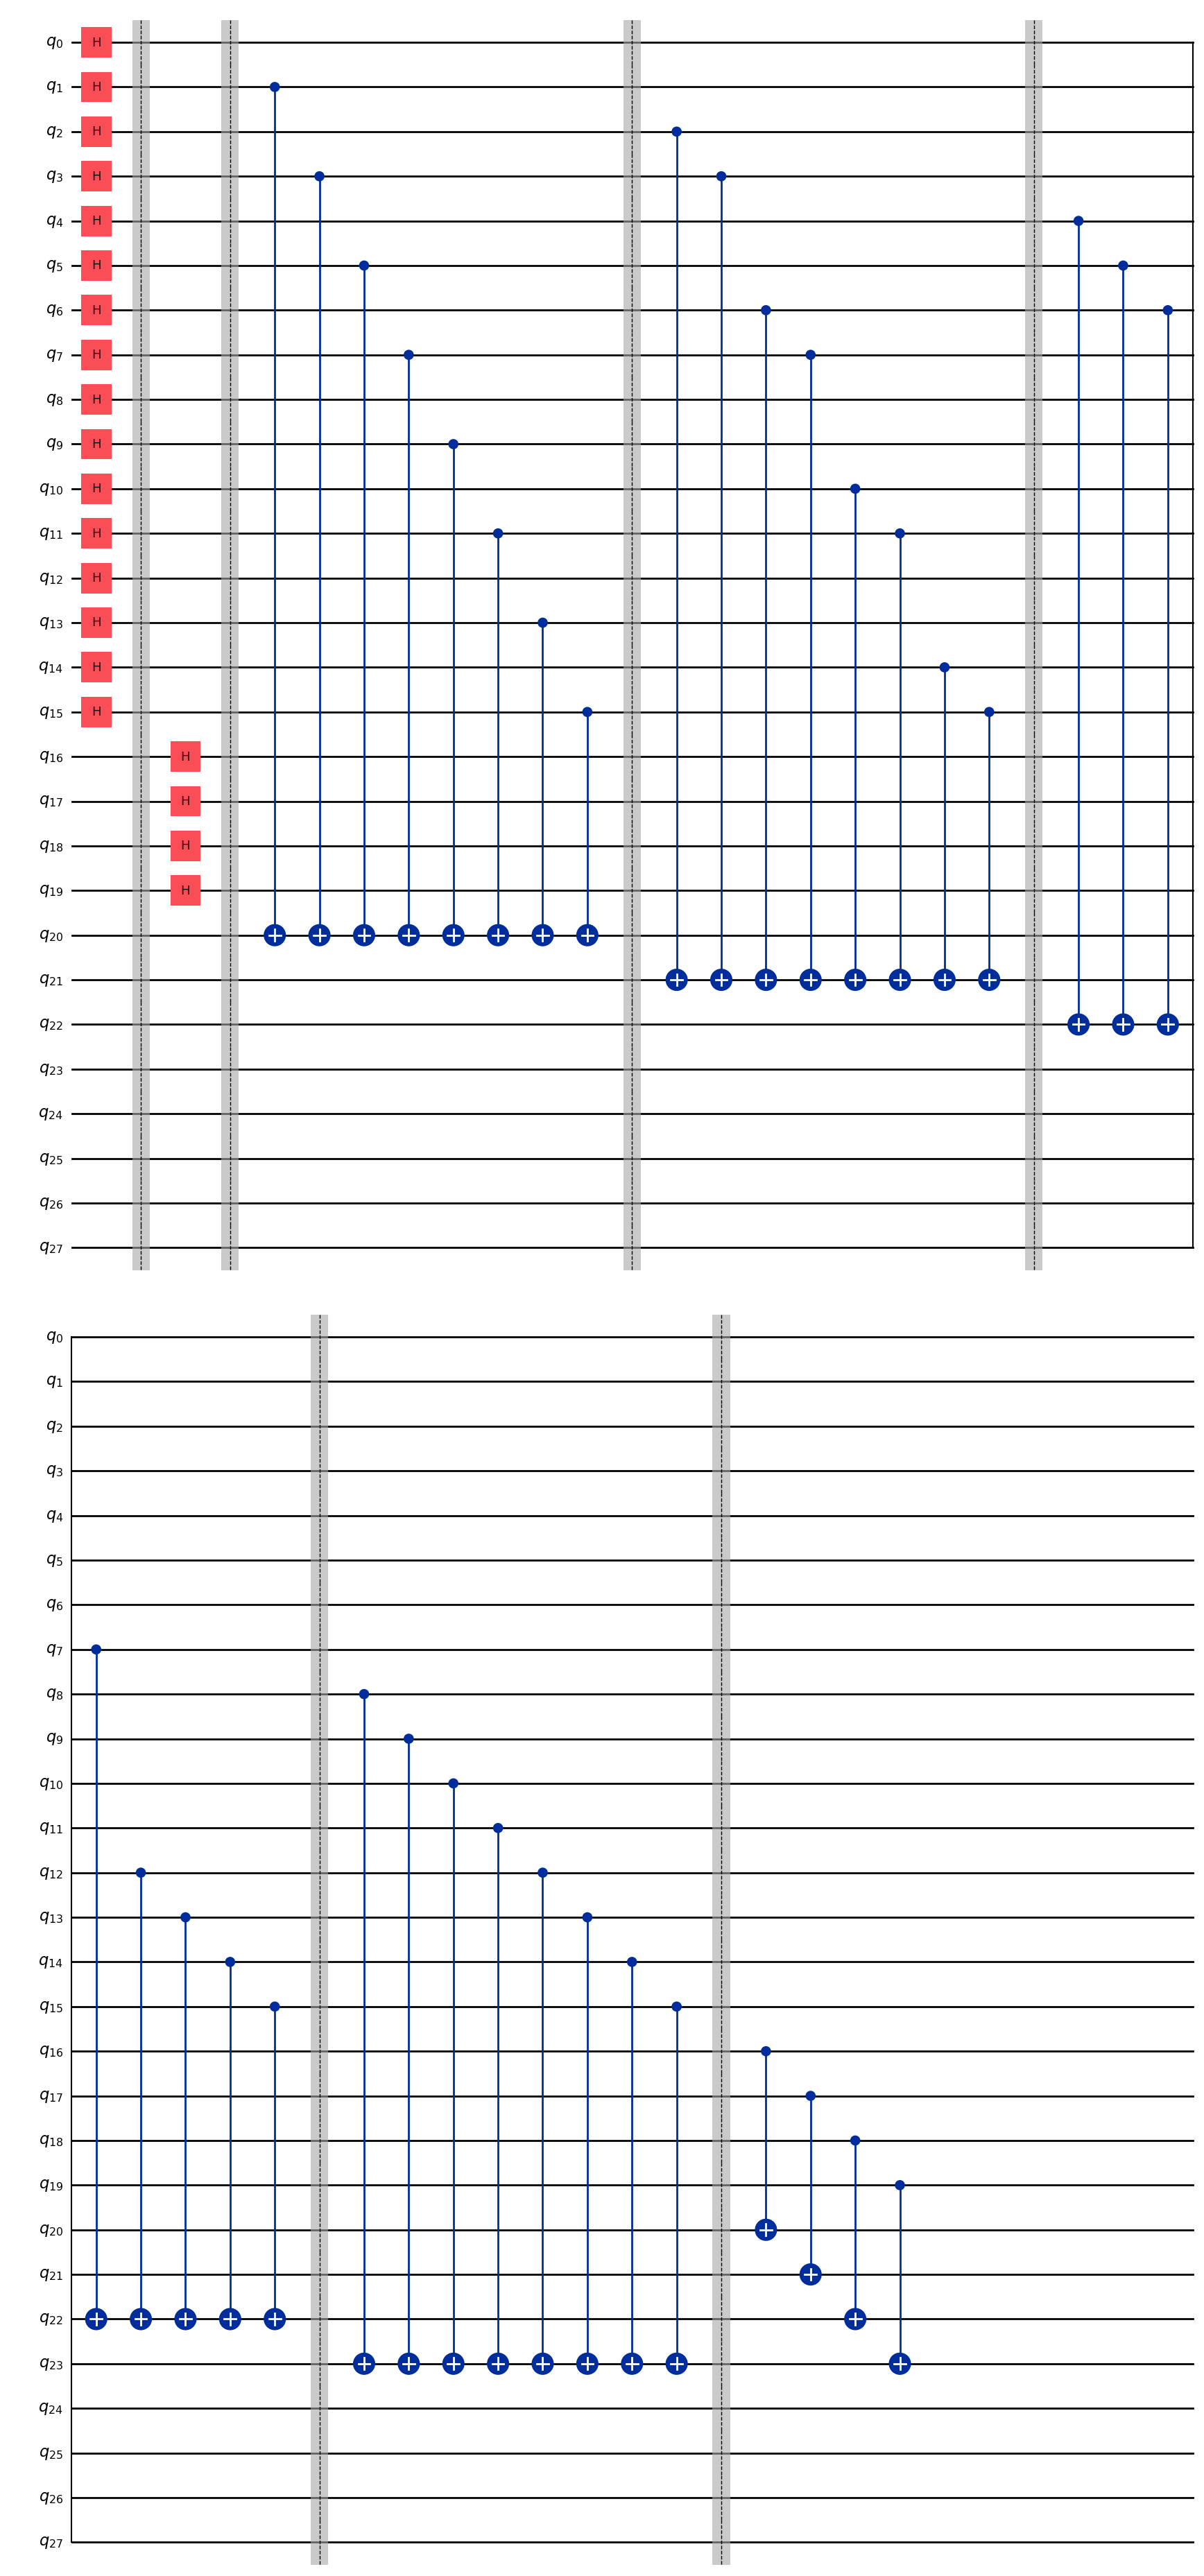

In [32]:
problem2_qc.draw(output='mpl')

**Question 3 :**

 Complete the circuit to allow Alice to turn the right coin

In [34]:
ctrl_qubits = [20, 21, 22, 23]
problem3_qc = problem2_qc.copy()
problem3_qc.barrier()

#turning the right coin on the bottom row
problem3_qc.mcx(ctrl_qubits, 15, ctrl_state='1111')

problem3_qc.mcx(ctrl_qubits, 14, ctrl_state='0111')

problem3_qc.mcx(ctrl_qubits, 13, ctrl_state='1011')

problem3_qc.mcx(ctrl_qubits, 12, ctrl_state='0011')

#turning the right coin on the 3rd row
problem3_qc.mcx(ctrl_qubits, 11, ctrl_state='1101')

problem3_qc.mcx(ctrl_qubits, 10, ctrl_state='0101')

problem3_qc.mcx(ctrl_qubits, 9, ctrl_state='1001')

problem3_qc.mcx(ctrl_qubits, 8, ctrl_state='0001')

#turning the right coin on the 2nd row
problem3_qc.mcx(ctrl_qubits, 7, ctrl_state='1110')

problem3_qc.mcx(ctrl_qubits, 6, ctrl_state='0110')

problem3_qc.mcx(ctrl_qubits, 5, ctrl_state='1010')

problem3_qc.mcx(ctrl_qubits, 4, ctrl_state='0010')

#turning the right coin on the top row
problem3_qc.mcx(ctrl_qubits, 3, ctrl_state='1100')

problem3_qc.mcx(ctrl_qubits, 2, ctrl_state='0100')

problem3_qc.mcx(ctrl_qubits, 1, ctrl_state='1000')

problem3_qc.mcx(ctrl_qubits, 0, ctrl_state='0000')

#now that the right coin has been turned, it is time to put the focus on the square where the key is located
problem3_qc.barrier()

#finding the parity of 1's on squares for which binary numbers finish by 1 and putting the answer on q24
problem3_qc.cx(1, 24)
problem3_qc.cx(3, 24)
problem3_qc.cx(5, 24)
problem3_qc.cx(7, 24)
problem3_qc.cx(9, 24)
problem3_qc.cx(11, 24)
problem3_qc.cx(13, 24)
problem3_qc.cx(15, 24)
problem3_qc.barrier()

#finding the parity of 1's on squares for which binary numbers have a 1 as second to last digit and putting the answer on q25
problem3_qc.cx(2, 25)
problem3_qc.cx(3, 25)
problem3_qc.cx(6, 25)
problem3_qc.cx(7, 25)
problem3_qc.cx(10, 25)
problem3_qc.cx(11, 25)
problem3_qc.cx(14, 25)
problem3_qc.cx(15, 25)
problem3_qc.barrier()

#finding the parity of 1's on squares for which binary numbers have a 1 as their 3rd digit from the right and putting the answer on q26
problem3_qc.cx(4, 26)
problem3_qc.cx(5, 26)
problem3_qc.cx(6, 26)
problem3_qc.cx(7, 26)
problem3_qc.cx(12, 26)
problem3_qc.cx(13, 26)
problem3_qc.cx(14, 26)
problem3_qc.cx(15, 26)
problem3_qc.barrier()

#finding the parity of 1's on squares for which binary numbers have a 1 as their 4th digit from the right and putting the answer on q27
problem3_qc.cx(8, 27)
problem3_qc.cx(9, 27)
problem3_qc.cx(10, 27)
problem3_qc.cx(11, 27)
problem3_qc.cx(12, 27)
problem3_qc.cx(13, 27)
problem3_qc.cx(14, 27)
problem3_qc.cx(15, 27)
problem3_qc.barrier()

#for i in range(16,20):
 #   problem3_qc.measure(i, i)
  #  problem3_qc.measure(i+8, i+8)

problem3_qc.draw(output='mpl')
fig = problem3_qc.draw(output='mpl')
fig.savefig("problem.png")